0.1999999999990898


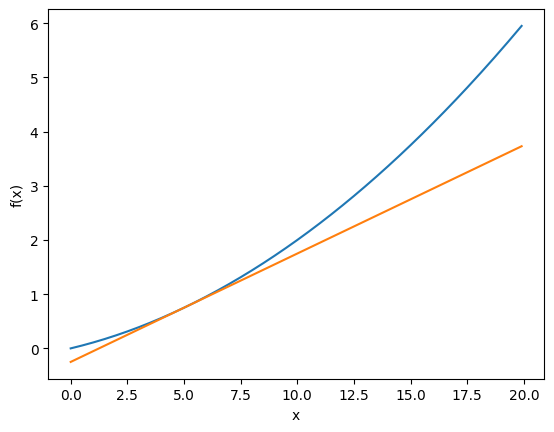

In [ ]:
# gradient_1d.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1) # x의 본질은 넘파이 1차원 배열
y = function_1(x)   # x 배열(0.1 간격)의 각 원소를 함수의 정의역의 대표원소에 점찍기 한다음 치역의 점찍기를 계산해서 이들을 이은것!!--> y2 도 마찬가지!
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


(2, 324)


/var/folders/cf/tyg_vn5x2l14jl434v4wh93r0000gn/T/ipykernel_64679/2622277432.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


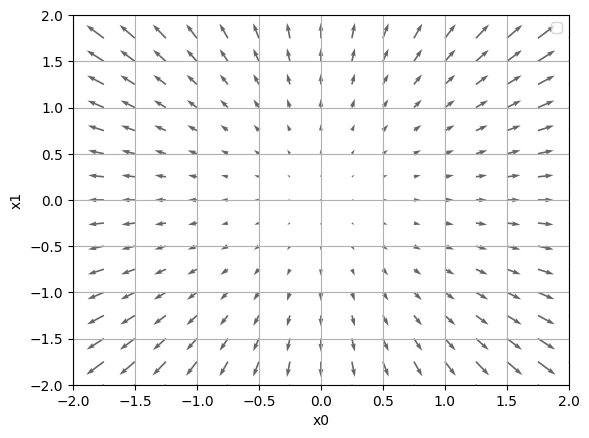

In [ ]:
# gradient_2d.py

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):  # 파이썬은 함수(대응관계)를 매개변수로 전달할 수 있다!
    if x.ndim == 1:  # 네, 파이썬은 함수를 매개변수로 전달하면, 그 함수의 정의와 동작을 매개변수에 저장하여 사용할 수 있습니다. 
                                # 이는 파이썬에서 **함수가 일급 객체(first-class object)**이기 때문에 가능한 것입니다.
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # _numerical_gradient_no_batch(f, x) 함수가 호출되고, 여기서 f(x)를 계산하기 위해 function_2가 호출됩니다.
    # 현재 코드 흐름에서 else: return np.sum(x**2, axis=1)는 필요하지 않습니다. 결국 _numerical_gradient_no_batch 에서 function_2가 호출되기때문!(항상 벡터를 입력받는 상황만 존재!)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten() 
    t= np.array([X, Y])     # t에서 전치하면?--> 한 행이 x,y 에 대한 미분으로 해석하는것! / t에서 전치 안하면?--> 한 행이 x or y에 대한 미분들로만 해석하는것!
    # t.shape?--> (2,324) / 행의 의미?--> 변수 개수 , 열의 의미?--> 격자점의 개수 / 첫번째 변수의 격자점 좌표 , 두번째 변수의 격자점 좌표
    # t.T.shape?-->(324,2)/ 행의 의미?--> 격자점의 개수 , 열의 의미?--> 변수 개수
    grad = numerical_gradient(function_2, t ) # 첫번째 (행)변수의 모든 (열)격자점에 대한 기울기를 구함!--> 기하학적 해석? --> 그 격자점을 지나면서 x 축과 평행하고 x,y 평면과 수직인 평면으로 곡면을 자를 때 생기는 접선의 기울기--> 기울기의 방향?--> x축의 정방향, 반대방향 두개 존재 in 벡터장(2차원) if 3차원?--> (1,0,파샬f/파샬x)벡터로 표현된다!(이유는 아직 모름!)
    print(grad.shape)  # t 와 원소의 번째가 그대로 맵핑된다!(사진 참고) / # 두번째 변수의 모든 격자점에 대한 기울기를 구함!--> 이 둘은 no 전치시 해석! / 격자점 X,Y 를 시점으로 하고 다변수 함수의 의 그래디언트를 계산하면, 해당 지점에서 함수의 증가 방향과 그 크기를 알 수 있습니다.
    plt.figure()            # 그래디언트 계산의 시점은 각 격자점이다!!! // 그래디언트 벡터의 크기는 일반적인 벡터의 크기와는 다른 정의를 가진다!(사진참고!)
    plt.quiver(X, Y, grad[0,:], grad[1,:],  angles="xy",color="#666666")# (X,Y) 에서의 grad 를 구해서 각 행의 열끼리 기울기를 계산한다!
    plt.xlim([-2, 2])   # 이해의 key? --> grad[0,:], grad[1,:]가 아닌 다른 1*324 넘파이 배열 2개 생각해보기!
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()
# 네, 전치하지 않은 경우 function_2는 "길이 324의 배열을 매개변수로 받는 324변수 함수"로 동작한다고 볼 수 있습니다. / 첫번째 변수의 격자점 좌표 , 두번째 변수의 격자점 좌표--> 이 경우는 function_2를 포물면으로 놓지 않고 포물면의 방향장을 구한 것임! 
# 자기만족?--> 3단원의 사고순서와 비슷!(t 와 원소의 번째가 그대로 맵핑된다!(필기사진 참고)가 첫이유!)
# 그래디언트 벡터를 x,y 평면에서 사고해야만 하는 이유?--> if y,z 평면에서 사고?--> x의 변화 읽기 불가능--> 그래디언트 벡터의 첫번째 원소 해석 불가능--> 끝!
# t를 전치하지 않으면 function_2를 포물면으로 해석하지 않고, 포물면의 방향장을 구하게 되는 것이 맞습니다.

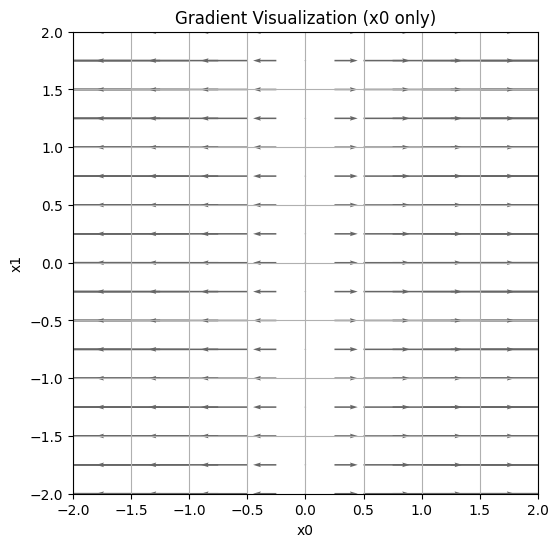

In [38]:
# test

import numpy as np
import matplotlib.pyplot as plt

def function_2(x):
    return np.sum(x**2)  # f(x) = x^2 + y^2

def numerical_gradient_pointwise(f, t):
    """
    각 데이터 포인트에 대해 개별적으로 기울기를 계산.
    """
    h = 1e-4
    grad = np.zeros_like(t)

    # 각 데이터 포인트별로 처리
    for i in range(t.shape[1]):  # t.shape[1] = 데이터 포인트 수 (N)
        tmp_val = t[:, i].copy()

        # f(x+h)
        t[:, i] = tmp_val + np.array([h, 0])  # x 방향으로 h만큼 이동
        fxh1 = f(t[:, i])

        # f(x-h)
        t[:, i] = tmp_val - np.array([h, 0])  # x 방향으로 h만큼 이동
        fxh2 = f(t[:, i])

        # 기울기 계산
        grad[0, i] = (fxh1 - fxh2) / (2 * h)  # x 방향 기울기
        grad[1, i] = 0  # y 방향 기울기는 시각화에서 필요하지 않으므로 0으로 설정

        # 원래 값 복원
        t[:, i] = tmp_val

    return grad

if __name__ == '__main__':
    # 격자 생성
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)  # 격자 생성
    X_flat = X.flatten()  # (N,) 형태로 평탄화
    Y_flat = Y.flatten()  # (N,) 형태로 평탄화

    # 데이터를 t에 저장 (전치하지 않음)
    t = np.array([X_flat, Y_flat])  # (2, N)

    # 첫 번째 변수 (x0)에 대한 기울기만 계산
    grad = numerical_gradient_pointwise(function_2, t)  # grad.shape = (2, 324)
    grad_x0 = grad[0]  # 첫 번째 변수 (x0) 방향 기울기만 추출

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.quiver(X_flat, Y_flat, grad_x0, np.zeros_like(grad_x0), angles="xy", color="#666666", scale=10)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.title("Gradient Visualization (x0 only)")
    plt.grid()
    plt.show()


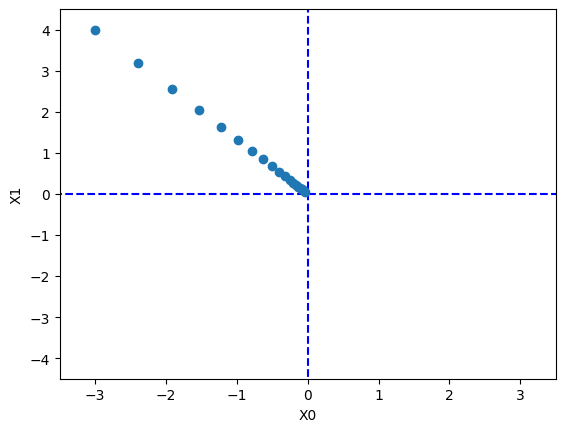

In [ ]:
# gradient_method.py


# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from modules.gradient_2d import numerical_gradient      

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x)    

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 파이썬에서는 변수는 객체의 주소를 저장한다 but, print 함수는 변수의 참조가 아닌 객체의 값을 출력하도록 설계되어 있다!
# 불변 객체 (예: 정수, 문자열): x += 1은 새로운 객체를 생성하여 x에 할당합니다. 따라서 id(x)는 변경됩니다.
# 가변 객체 (예: 리스트, NumPy 배열): x += 1 은 객체 자체를 수정합니다. 즉, 새로운 객체를 생성하지 않고 기존 객체를 변경합니다. 따라서 id(x)는 동일하게 유지됩니다.
# 18행 경사하강법의 코드에서 넘파이 배열은 가변 객체이므로 -= 연산을 하기 전과 후는 동일한 주소를 갖는다. 현재의 x 값은 마지막 변경된 값을 취한다! 
# what is 객체 자체를 수정한다 함?--> 새로운 객체를 만들지 않고 그 객체의 값을 변경시키는것!--> id 가 동일 --> 같은 값 공유(연동)
# x -= lr * grad 을 하는 순간 과거의 x(들)은 항상 현재의 x로 바뀐다!--> 이유?-->파이썬에서 변수는 객체에 대한 참조(주소)를 저장합니다.
# gradient_2d.py 의 0번째 들여쓰기는 모두 인식된다!
# 네, 모듈이 로드되면 0번째 들여쓰기의 모든 함수와 클래스의 정의와 그 내용까지 메모리에 로드됩니다.

In [4]:
# gradient_simplenet.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.22847109  0.25044785 -0.47891894]
 [ 0.34270664  0.37567177 -0.71837841]]


train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.79565, 0.7995
train acc, test acc | 0.87625, 0.8801
train acc, test acc | 0.8994666666666666, 0.9018
train acc, test acc | 0.9082166666666667, 0.9115
train acc, test acc | 0.9149, 0.9157
train acc, test acc | 0.9211833333333334, 0.9231
train acc, test acc | 0.9254833333333333, 0.9266
train acc, test acc | 0.9284166666666667, 0.9286
train acc, test acc | 0.9324166666666667, 0.9325
train acc, test acc | 0.9342666666666667, 0.9342
train acc, test acc | 0.9384666666666667, 0.938
train acc, test acc | 0.9393333333333334, 0.9403
train acc, test acc | 0.9422666666666667, 0.9414
train acc, test acc | 0.94395, 0.9427
train acc, test acc | 0.9451, 0.9447
train acc, test acc | 0.9475333333333333, 0.9463


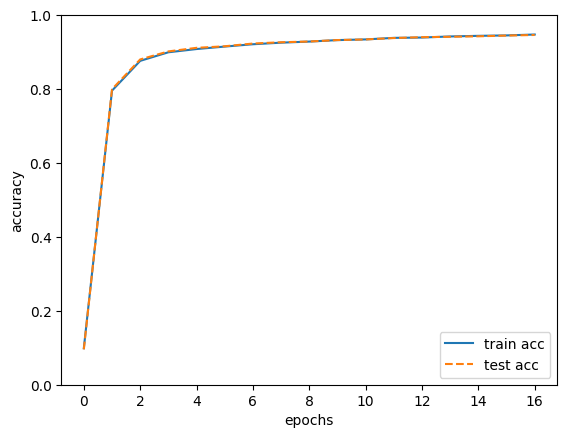

In [3]:
# train_neuralnet.py
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from modules.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [18]:
# two_layer_net.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
